#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.preprocessing import MinMaxScaler

## Dataset 1

In [2]:
df1 = pd.read_csv('CSurvey1_Trans_5level_imb.csv')

In [3]:
y = df1.CGPA
X = df1.drop("CGPA", axis = 1)
colnames = X.columns

In [4]:
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
feat_selector = BorutaPy(rf, n_estimators='auto', random_state=1)

In [5]:
feat_selector.fit(X.values, y.values.ravel())

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=56, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x1233E3ED840),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x1233E3ED840)

In [6]:
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order * np.array([ranks]).T).T[0]
    ranks = list(map(lambda x: round(x, 2), ranks))
    return dict(zip(names, ranks))

# Get feature scores and sort by score
boruta_score = ranking(feat_selector.ranking_, colnames, order=-1)
boruta_score_df = pd.DataFrame(list(boruta_score.items()), columns=['Features', 'Score'])
boruta_score_df['To_Keep'] = feat_selector.support_
boruta_score_df = boruta_score_df.sort_values(by=['Score'], ascending=False)

# Display the ranked features
print("Ranked Features:")
print(boruta_score_df)

Ranked Features:
                                 Features  Score  To_Keep
10              Number of Subjects Failed   1.00     True
11                         SPM Result (A)   0.97    False
8                          Years of Study   0.97    False
36                    Alcohol Consumption   0.95    False
16  Reason Study at Multimedia University   0.92    False
26                    Father's Occupation   0.89    False
13                         SPM Result (C)   0.87    False
3                           Living Status   0.84    False
27                    Mother's Occupation   0.82    False
38                     Social Interaction   0.79    False
25        Parent's Education Level.Mother   0.76    False
29                      Financial Support   0.74    False
12                         SPM Result (B)   0.74    False
4                               Home Town   0.68    False
6                                 Faculty   0.66    False
37    I have enough free time after class   0.63    Fal

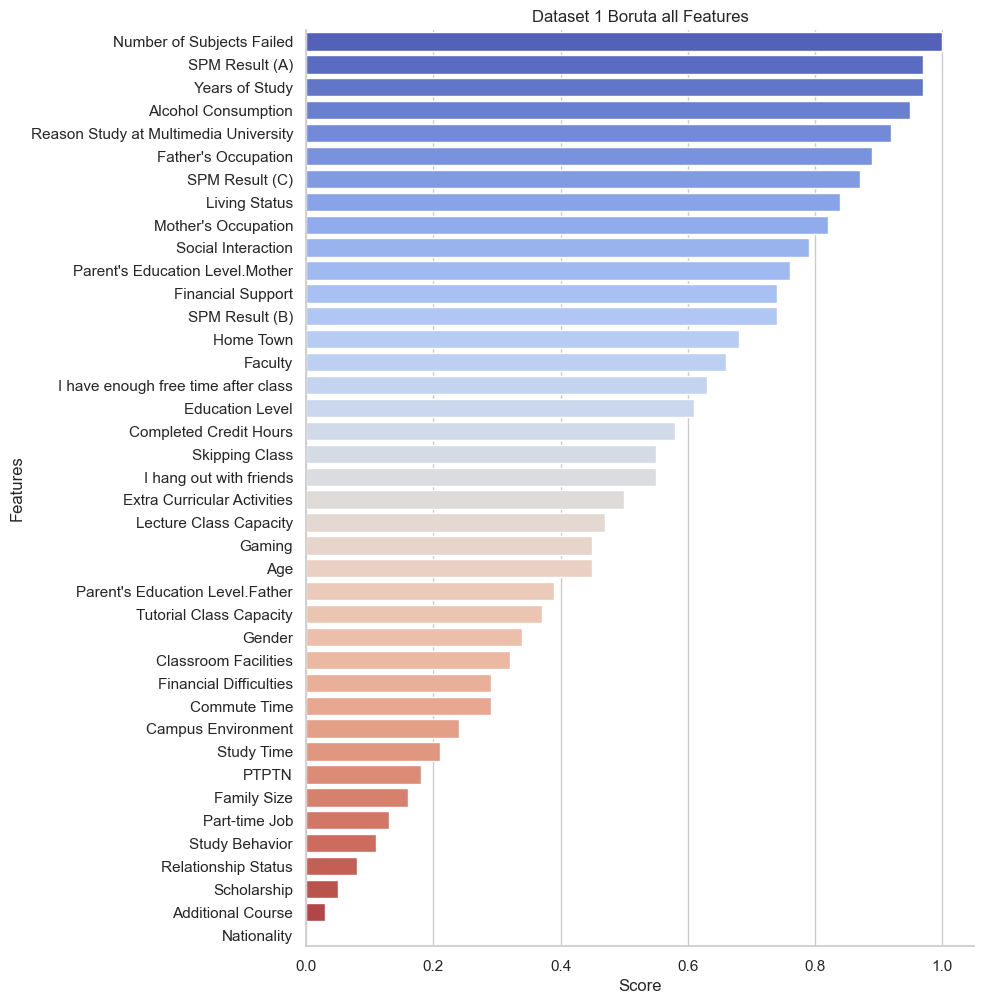

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming boruta_score_df is already defined and sorted
sns.set(style="whitegrid")

# Plotting with Seaborn catplot
sns_boruta_plot = sns.catplot(x="Score", y="Features", data=boruta_score_df, kind="bar", height=10, aspect=1, palette='coolwarm')
plt.title("Dataset 1 Boruta all Features")
plt.show()
sns_boruta_plot.savefig('Dataset 1 Feature Selection.png', dpi=300)

## Dataset 2

In [8]:
df2 = pd.read_csv('CSurvey2_Trans_5level_imb.csv')

In [9]:
y = df2.CGPA
X = df2.drop("CGPA", axis = 1)
colnames = X.columns

In [10]:
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
feat_selector = BorutaPy(rf, n_estimators='auto', random_state=1)

In [11]:
feat_selector.fit(X.values, y.values.ravel())

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=63, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x1233FA6A640),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x1233FA6A640)

In [12]:
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order * np.array([ranks]).T).T[0]
    ranks = list(map(lambda x: round(x, 2), ranks))
    return dict(zip(names, ranks))

# Get feature scores and sort by score
boruta_score = ranking(feat_selector.ranking_, colnames, order=-1)
boruta_score_df = pd.DataFrame(list(boruta_score.items()), columns=['Features', 'Score'])
boruta_score_df['To_Keep'] = feat_selector.support_
boruta_score_df = boruta_score_df.sort_values(by=['Score'], ascending=False)

# Display the ranked features
print("Ranked Features:")
print(boruta_score_df)

Ranked Features:
                                 Features  Score  To_Keep
6                                 Faculty   1.00     True
10              Number of Subjects Failed   1.00     True
11                         SPM Result (A)   1.00     True
13                         SPM Result (C)   1.00     True
27                    Mother's Occupation   0.97    False
24        Parent's Education Level.Father   0.94    False
25        Parent's Education Level.Mother   0.91    False
31                             Study Time   0.89    False
12                         SPM Result (B)   0.86    False
20                   Classroom Facilities   0.83    False
19                         Skipping Class   0.80    False
32            Extra Curricular Activities   0.77    False
26                    Father's Occupation   0.74    False
38                     Social Interaction   0.71    False
39                I hang out with friends   0.69    False
37    I have enough free time after class   0.66    Fal

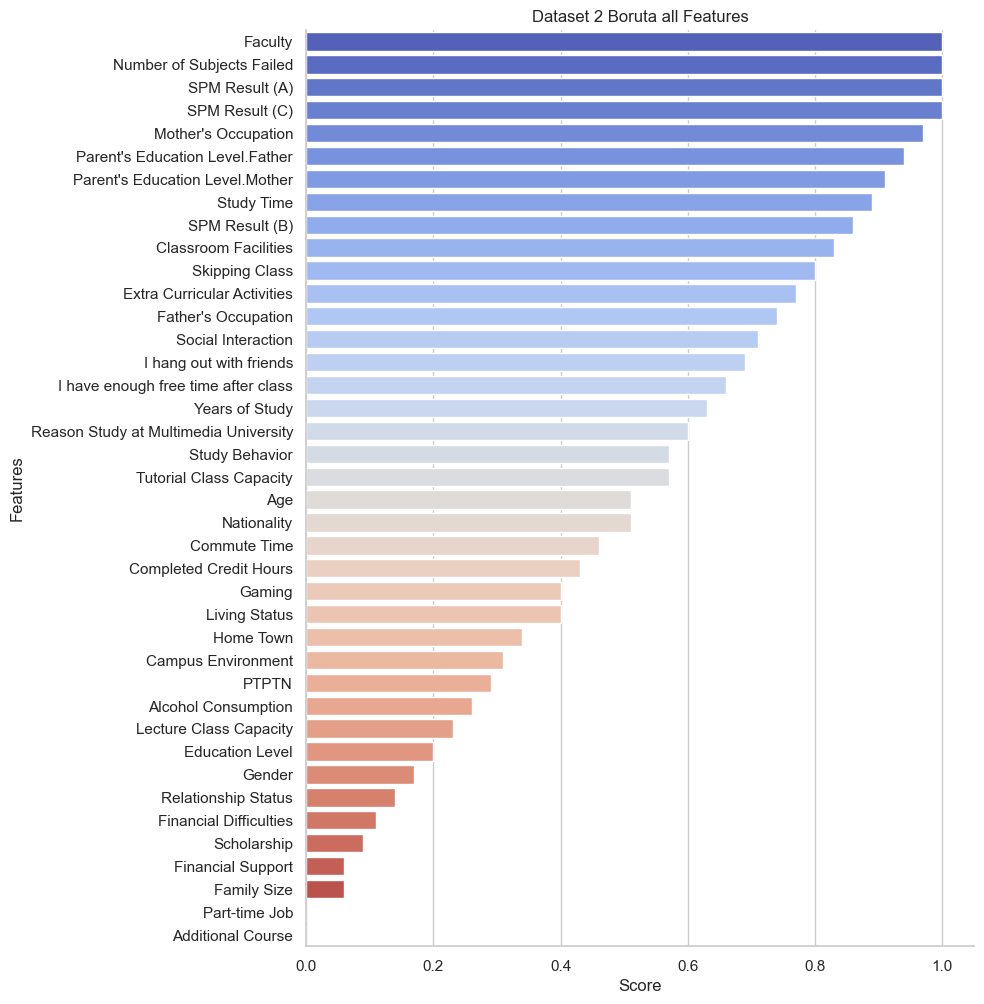

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming boruta_score_df is already defined and sorted
sns.set(style="whitegrid")

# Plotting with Seaborn catplot
sns_boruta_plot = sns.catplot(x="Score", y="Features", data=boruta_score_df, kind="bar", height=10, aspect=1, palette='coolwarm')
plt.title("Dataset 2 Boruta all Features")
plt.show()
sns_boruta_plot.savefig('Dataset 2 Feature Selection.png', dpi=300)

## Merged Dataset

In [14]:
df3 = pd.read_csv('merge_5L_imb.csv')

In [15]:
y = df3.CGPA
X = df3.drop("CGPA", axis = 1)
colnames = X.columns

In [16]:
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
feat_selector = BorutaPy(rf, n_estimators='auto', random_state=1)

In [17]:
feat_selector.fit(X.values, y.values.ravel())

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=48, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x1233FA6AA40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x1233FA6AA40)

In [18]:
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order * np.array([ranks]).T).T[0]
    ranks = list(map(lambda x: round(x, 2), ranks))
    return dict(zip(names, ranks))

# Get feature scores and sort by score
boruta_score = ranking(feat_selector.ranking_, colnames, order=-1)
boruta_score_df = pd.DataFrame(list(boruta_score.items()), columns=['Features', 'Score'])
boruta_score_df['To_Keep'] = feat_selector.support_
boruta_score_df = boruta_score_df.sort_values(by=['Score'], ascending=False)

# Display the ranked features
print("Ranked Features:")
print(boruta_score_df)

Ranked Features:
                                 Features  Score  To_Keep
10              Number of Subjects Failed   1.00     True
11                         SPM Result (A)   1.00     True
27                    Mother's Occupation   0.97    False
13                         SPM Result (C)   0.97    False
12                         SPM Result (B)   0.95    False
6                                 Faculty   0.92    False
16  Reason Study at Multimedia University   0.89    False
19                         Skipping Class   0.86    False
26                    Father's Occupation   0.84    False
25        Parent's Education Level.Mother   0.81    False
20                   Classroom Facilities   0.76    False
24        Parent's Education Level.Father   0.76    False
38                     Social Interaction   0.70    False
4                               Home Town   0.70    False
0                                     Age   0.68    False
39                I hang out with friends   0.65    Fal

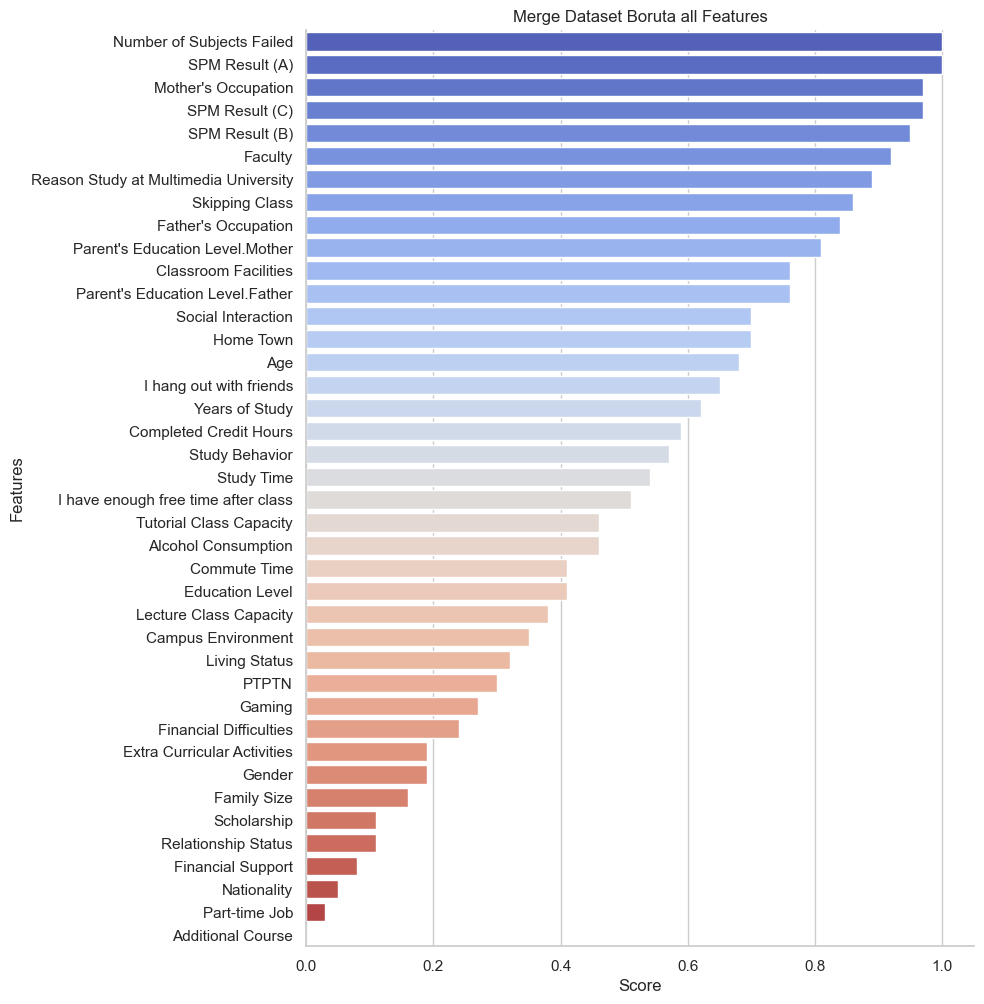

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming boruta_score_df is already defined and sorted
sns.set(style="whitegrid")

# Plotting with Seaborn catplot
sns_boruta_plot = sns.catplot(x="Score", y="Features", data=boruta_score_df, kind="bar", height=10, aspect=1, palette='coolwarm')
plt.title("Merge Dataset Boruta all Features")
plt.show()
sns_boruta_plot.savefig('Merge Dataset Feature Selection.png', dpi=300)